## Problem Statement

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Import Data Set

#### Data Dictionary

    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2]:
bikes = pd.read_csv('../DataSet/day.csv')

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Visualise Data Set

In [6]:
bikes.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


<Figure size 2592x2016 with 0 Axes>

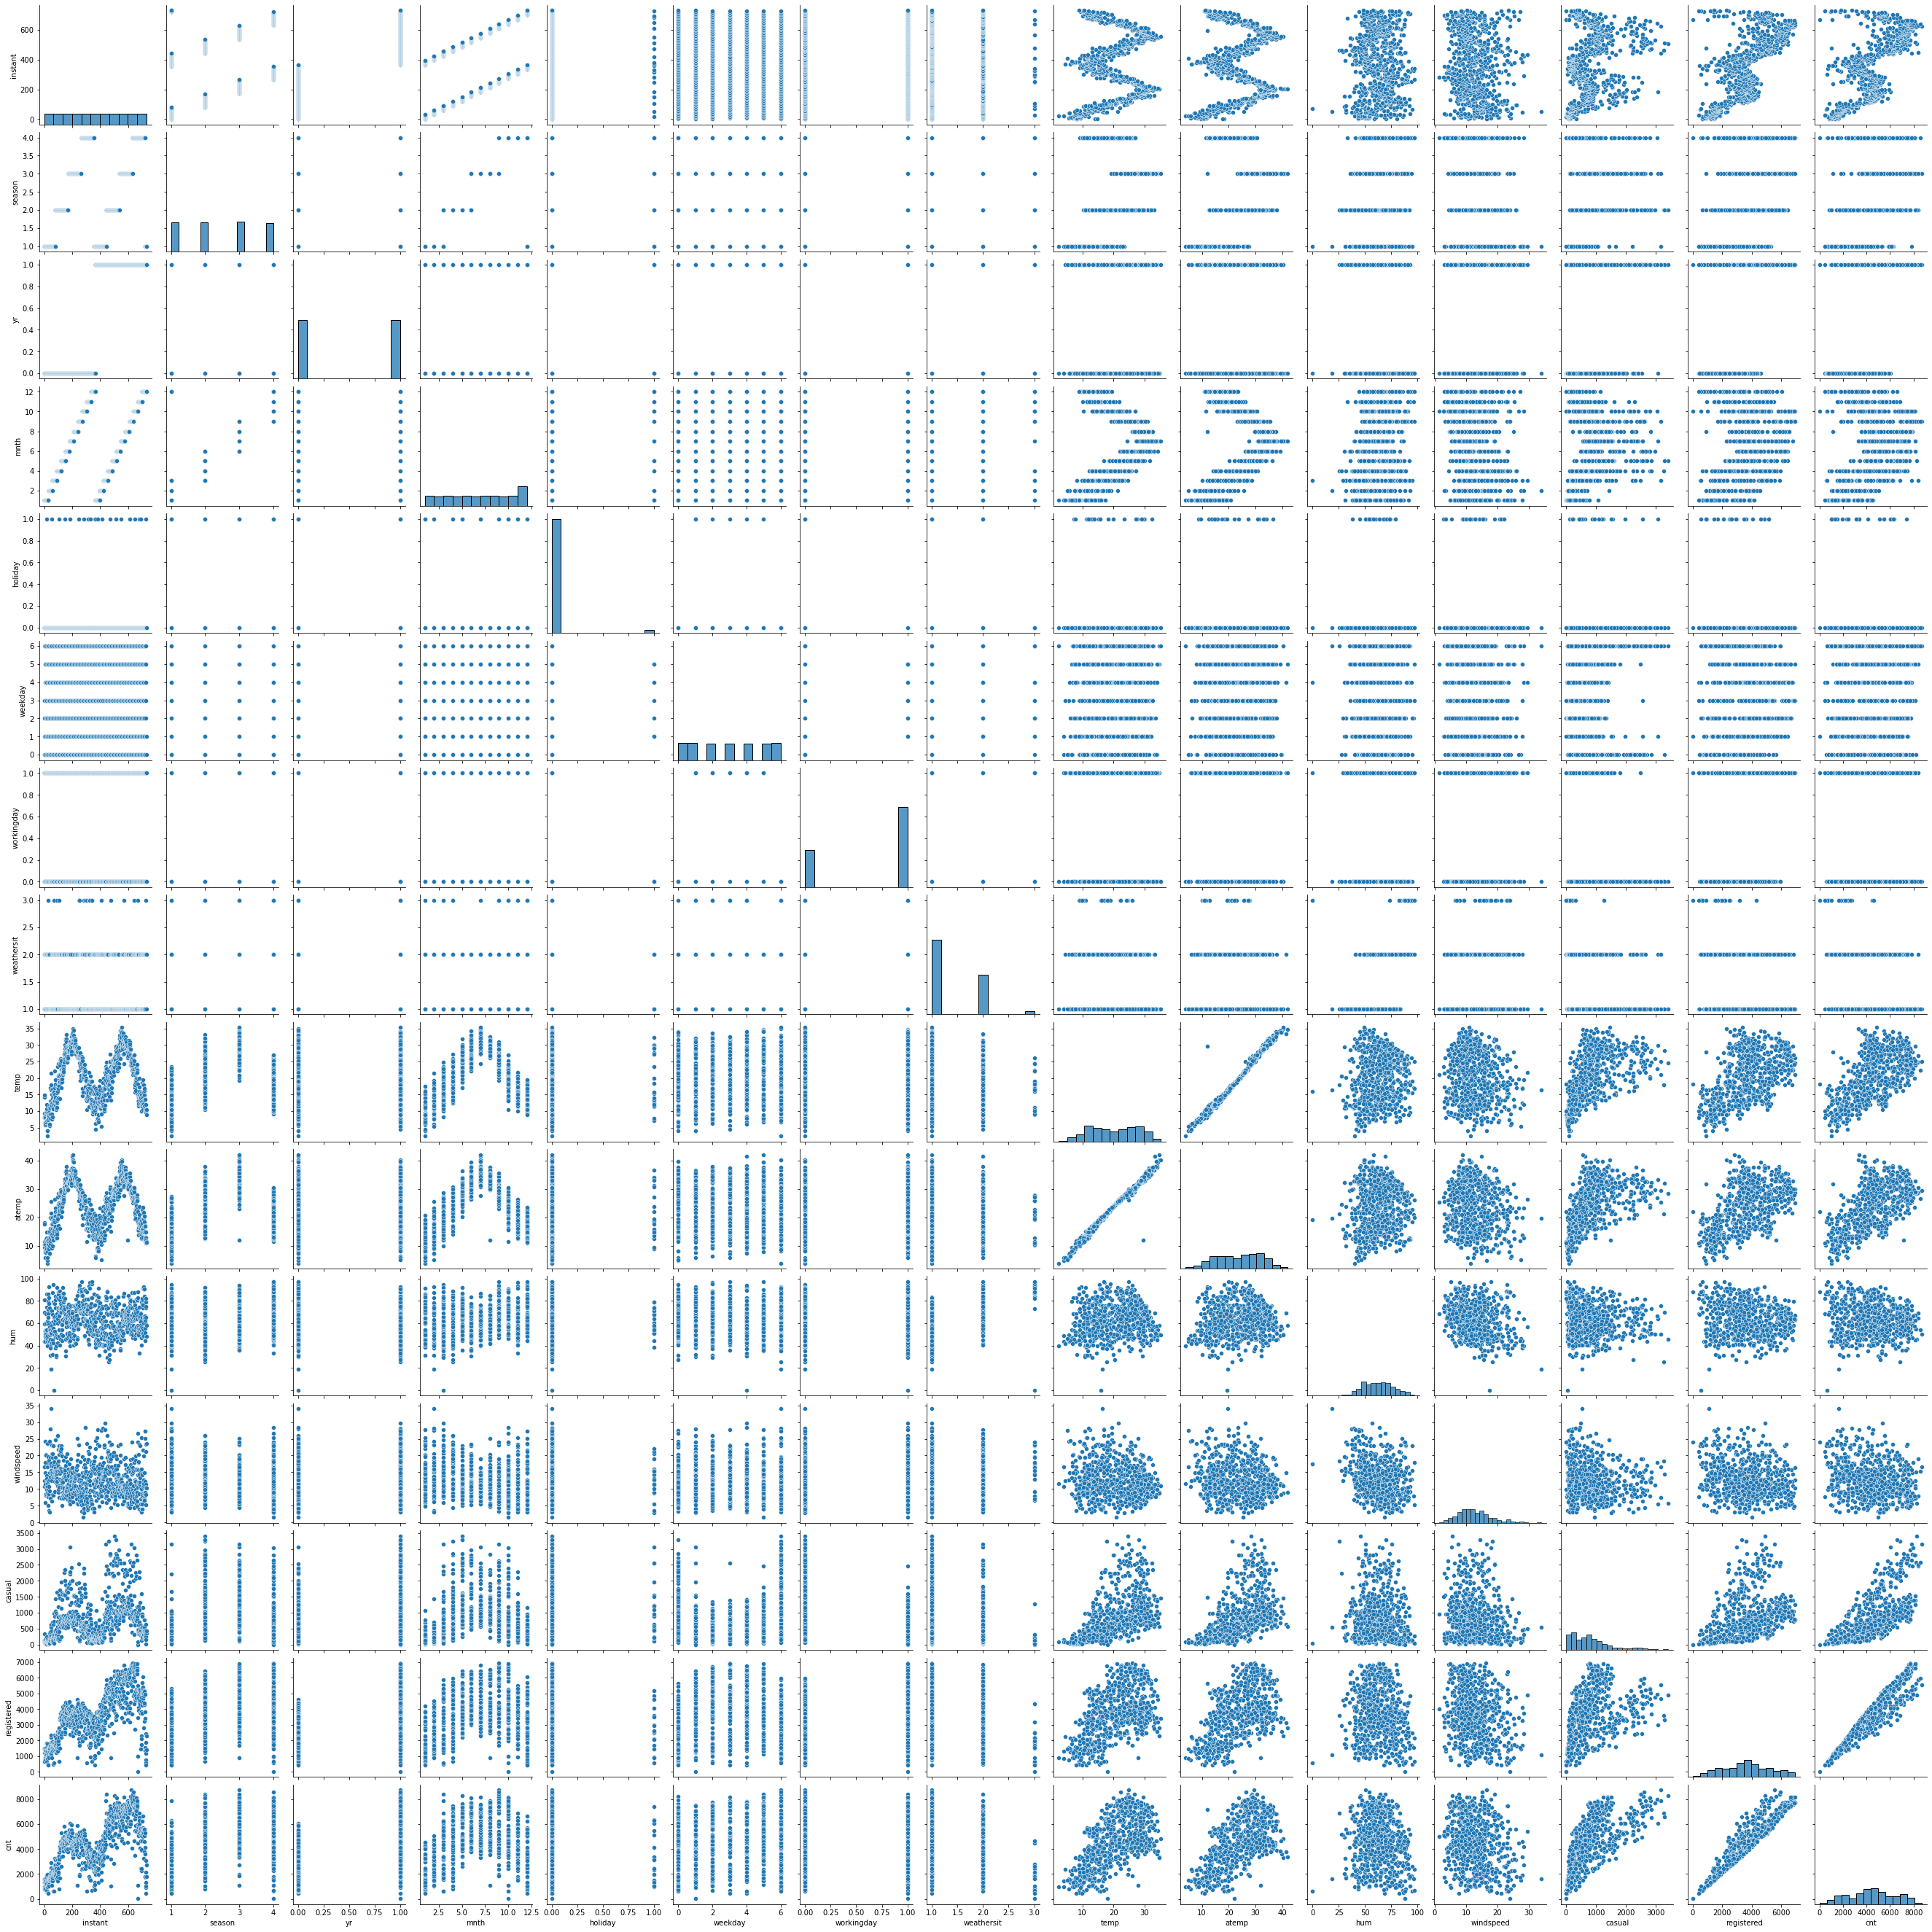

In [7]:
plt.figure(figsize=(36,28))
sns.pairplot(bikes)
plt.show()

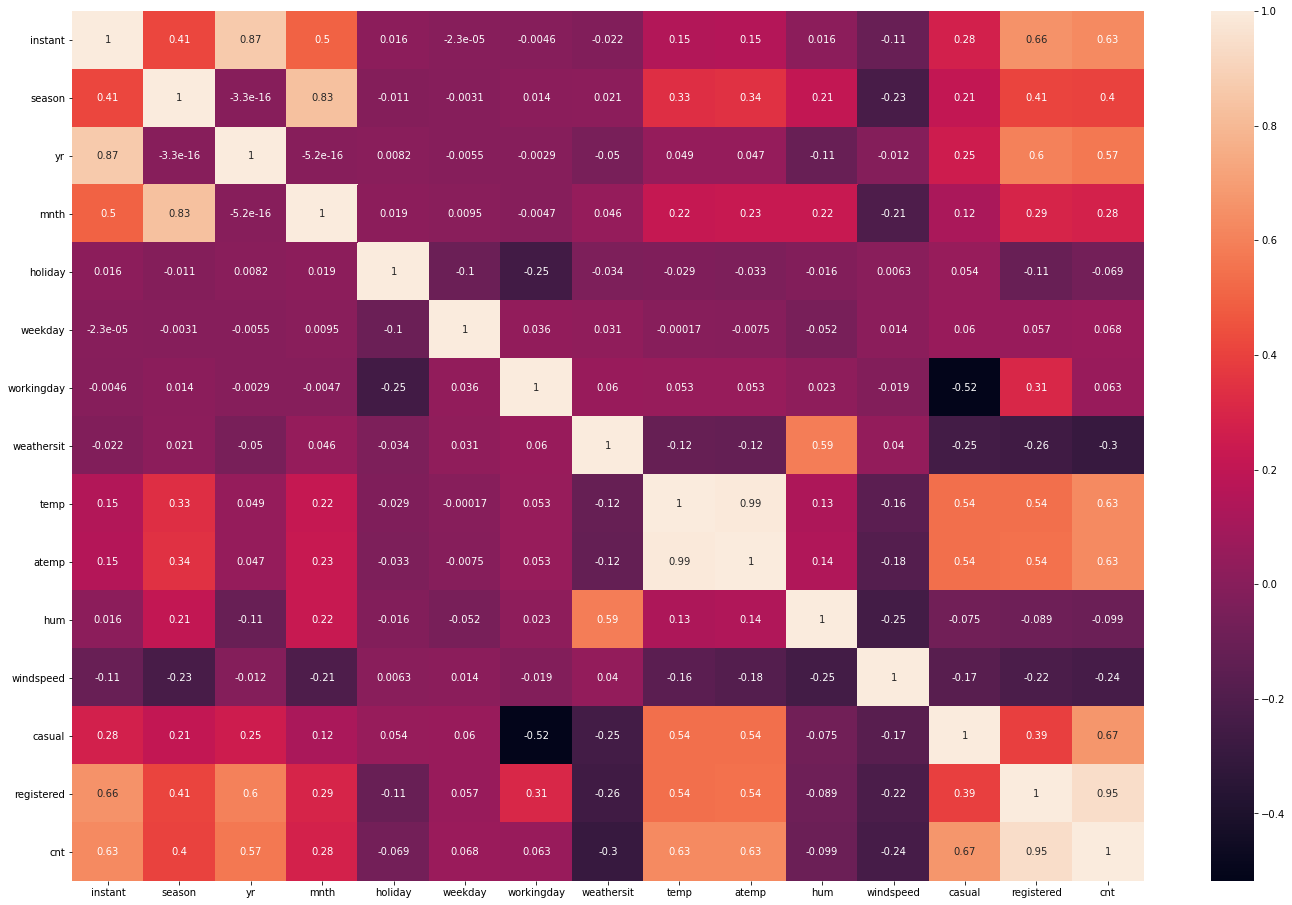

In [8]:
plt.figure(figsize=(24,16))
sns.heatmap(bikes.corr(), annot=True)
plt.show()

It can be noted from the scatter plot and heatmap that the columns <b>`temp`</b>, <b>`casual`</b>, and <b>`registered`</b> have the linear correlation. But this cannot be proved as a causation that count of bikes rented on any given day has a strong relationship with these column at this point.

Plotting a box plot to see the realtionship betweeen count and categorical data.

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- holiday : whether day is a holiday or not
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

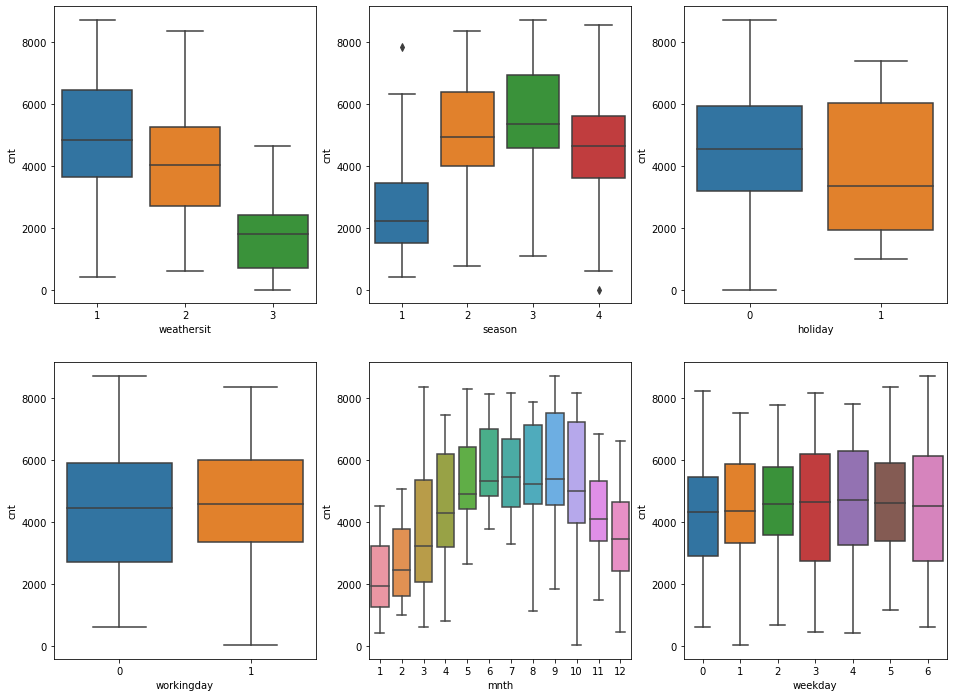

In [9]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.show()

### Data Pre-Processing

Removing <b>`instant`</b> column as it has no significance with the data set.
Removing the column <b>`dteday`</b> as it has been bifurcated by the variables <b>`mnth`</b> and <b>`yr`</b>.
Removing the columns <b>`casual`</b> and <b>`registered`</b> as they are not features.

In [10]:
bikes.drop(['instant', 'dteday','casual','registered'],axis=1, inplace=True)

Mapping the values of season to their actual value. 
 - season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [11]:
def season(x):
    if x == 1:
        return "spring"
    elif x == 2:
        return "summer"
    elif x == 3:
        return "fall"
    elif x == 4:
        return "winter"
bikes['season'] = bikes['season'].apply(season)

In [12]:
def weather(x):
    if x == 1:
        return "partly_cloudy"
    elif x == 2:
        return "misty_cloudy"
    elif x == 3:
        return "light_rain_snow"
    elif x == 4:
        return "storm"
bikes['weathersit'] = bikes['weathersit'].apply(weather)

In [13]:
def month(x):
    if x == 1:
        return "january"
    elif x == 2:
        return "february"
    elif x == 3:
        return "march"
    elif x == 4:
        return "april"
    elif x == 5:
        return "may"
    elif x == 6:
        return "june"   
    elif x == 7:
        return "july"
    elif x == 8:
        return "august"
    elif x == 9:
        return "september"
    elif x == 10:
        return "october"
    elif x == 11:
        return "november"  
    elif x == 12:
        return "december"      
bikes['mnth'] = bikes['mnth'].apply(month)

In [14]:
def weekday(x):
    if x == 0:
        return "tuesday"
    elif x == 1:
        return "wednesday"
    elif x == 2:
        return "thursday"
    elif x == 3:
        return "friday"
    elif x == 4:
        return "saturday"
    elif x == 5:
        return "sunday"
    elif x == 6:
        return "monday"   
bikes['weekday'] = bikes['weekday'].apply(weekday)

### Dummy Variables

We can drop the `fall` column as the seasons can be identified with 3 columns
- `000` corresponds to `fall`
- `100` corresponds to `spring`
- `010` corresponds to `summer`
- `001` corresponds to `winter`

In [15]:
season_dummy = pd.get_dummies(bikes['season'],drop_first=True, dtype='int64')
bikes = pd.concat([bikes, season_dummy], axis = 1)
bikes.drop(['season'], axis=1, inplace=True)

#### Note: The data set does not contain data for `weathersit` column equal to 4 (i.e. no record of bikes given for rent by BoomBike when the weather had Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog )

We can drop the `light_rain_snow` column as the weather can be identified with 2 columns
- `00` corresponds to `light_rain_snow`
- `10` corresponds to `misty_cloudy`
- `01` corresponds to `partly_cloudy`

In [16]:
weather_dummy = pd.get_dummies(bikes['weathersit'], drop_first=True, dtype='int64')
bikes = pd.concat([bikes, weather_dummy], axis = 1)
bikes.drop(['weathersit'], axis=1, inplace=True)

Creating dummy variables for months where we will keep 11 out of 12 levels of the variable <b>`mnth`</b>. So we'll drop the first level that is <b>April</b>.

- `00010000000` corresponds to the month `january`
- `00100000000` corresponds to the month `february`
- `00000010000` corresponds to the month `march`
- `00000000000` corresponds to the month `april`
- `00000001000` corresponds to the month `may`
- `00000100000` corresponds to the month `june`
- `00001000000` corresponds to the month `july`
- `10000000000` corresponds to the month `august`
- `00000000001` corresponds to the month `september`
- `00000000010` corresponds to the month `october`
- `00000000100` corresponds to the month `november`
- `01000000000` corresponds to the month `december`

In [17]:
month_dummy = pd.get_dummies(bikes['mnth'], drop_first=True, dtype='int64')
bikes = pd.concat([bikes, month_dummy], axis = 1)
bikes.drop(['mnth'], axis=1, inplace=True)

Creating dummy variables for weekday where we will keep 6 out of 7 levels of the variable <b>`weekday`</b>. So we'll drop the first level that is <b>friday</b>.

- `001000` corresponds to the weekday `sunday`
- `100000` corresponds to the weekday `monday`
- `000010` corresponds to the weekday `tuesday`
- `000001` corresponds to the weekday `wednesday`
- `000100` corresponds to the weekday `thursday`
- `000000` corresponds to the weekday `friday`
- `010000` corresponds to the weekday `saturday`

In [18]:
weekday_dummy = pd.get_dummies(bikes['weekday'], drop_first=True, dtype='int64')
bikes = pd.concat([bikes, weekday_dummy], axis = 1)
bikes.drop(['weekday'], axis=1, inplace=True)

In [19]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   spring         730 non-null    int64  
 9   summer         730 non-null    int64  
 10  winter         730 non-null    int64  
 11  misty_cloudy   730 non-null    int64  
 12  partly_cloudy  730 non-null    int64  
 13  august         730 non-null    int64  
 14  december       730 non-null    int64  
 15  february       730 non-null    int64  
 16  january        730 non-null    int64  
 17  july           730 non-null    int64  
 18  june      

### Train-Test Data Split

In [21]:
np.random.seed(0)
df_train, df_test = train_test_split(bikes,train_size=0.8,test_size=0.2,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


### Rescale Data

In [22]:
scaler = MinMaxScaler()

In [23]:
cols_to_scale = ['temp','atemp','hum','windspeed','cnt']
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

In [24]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,...,0,0,0,0,0,0,0,1,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,0,0,1,0,0,1,0,0,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,...,0,0,0,0,0,0,0,0,0,1
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,0,0,0,0,0,0,1,0,0,0
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,...,0,0,0,0,0,0,0,0,1,0


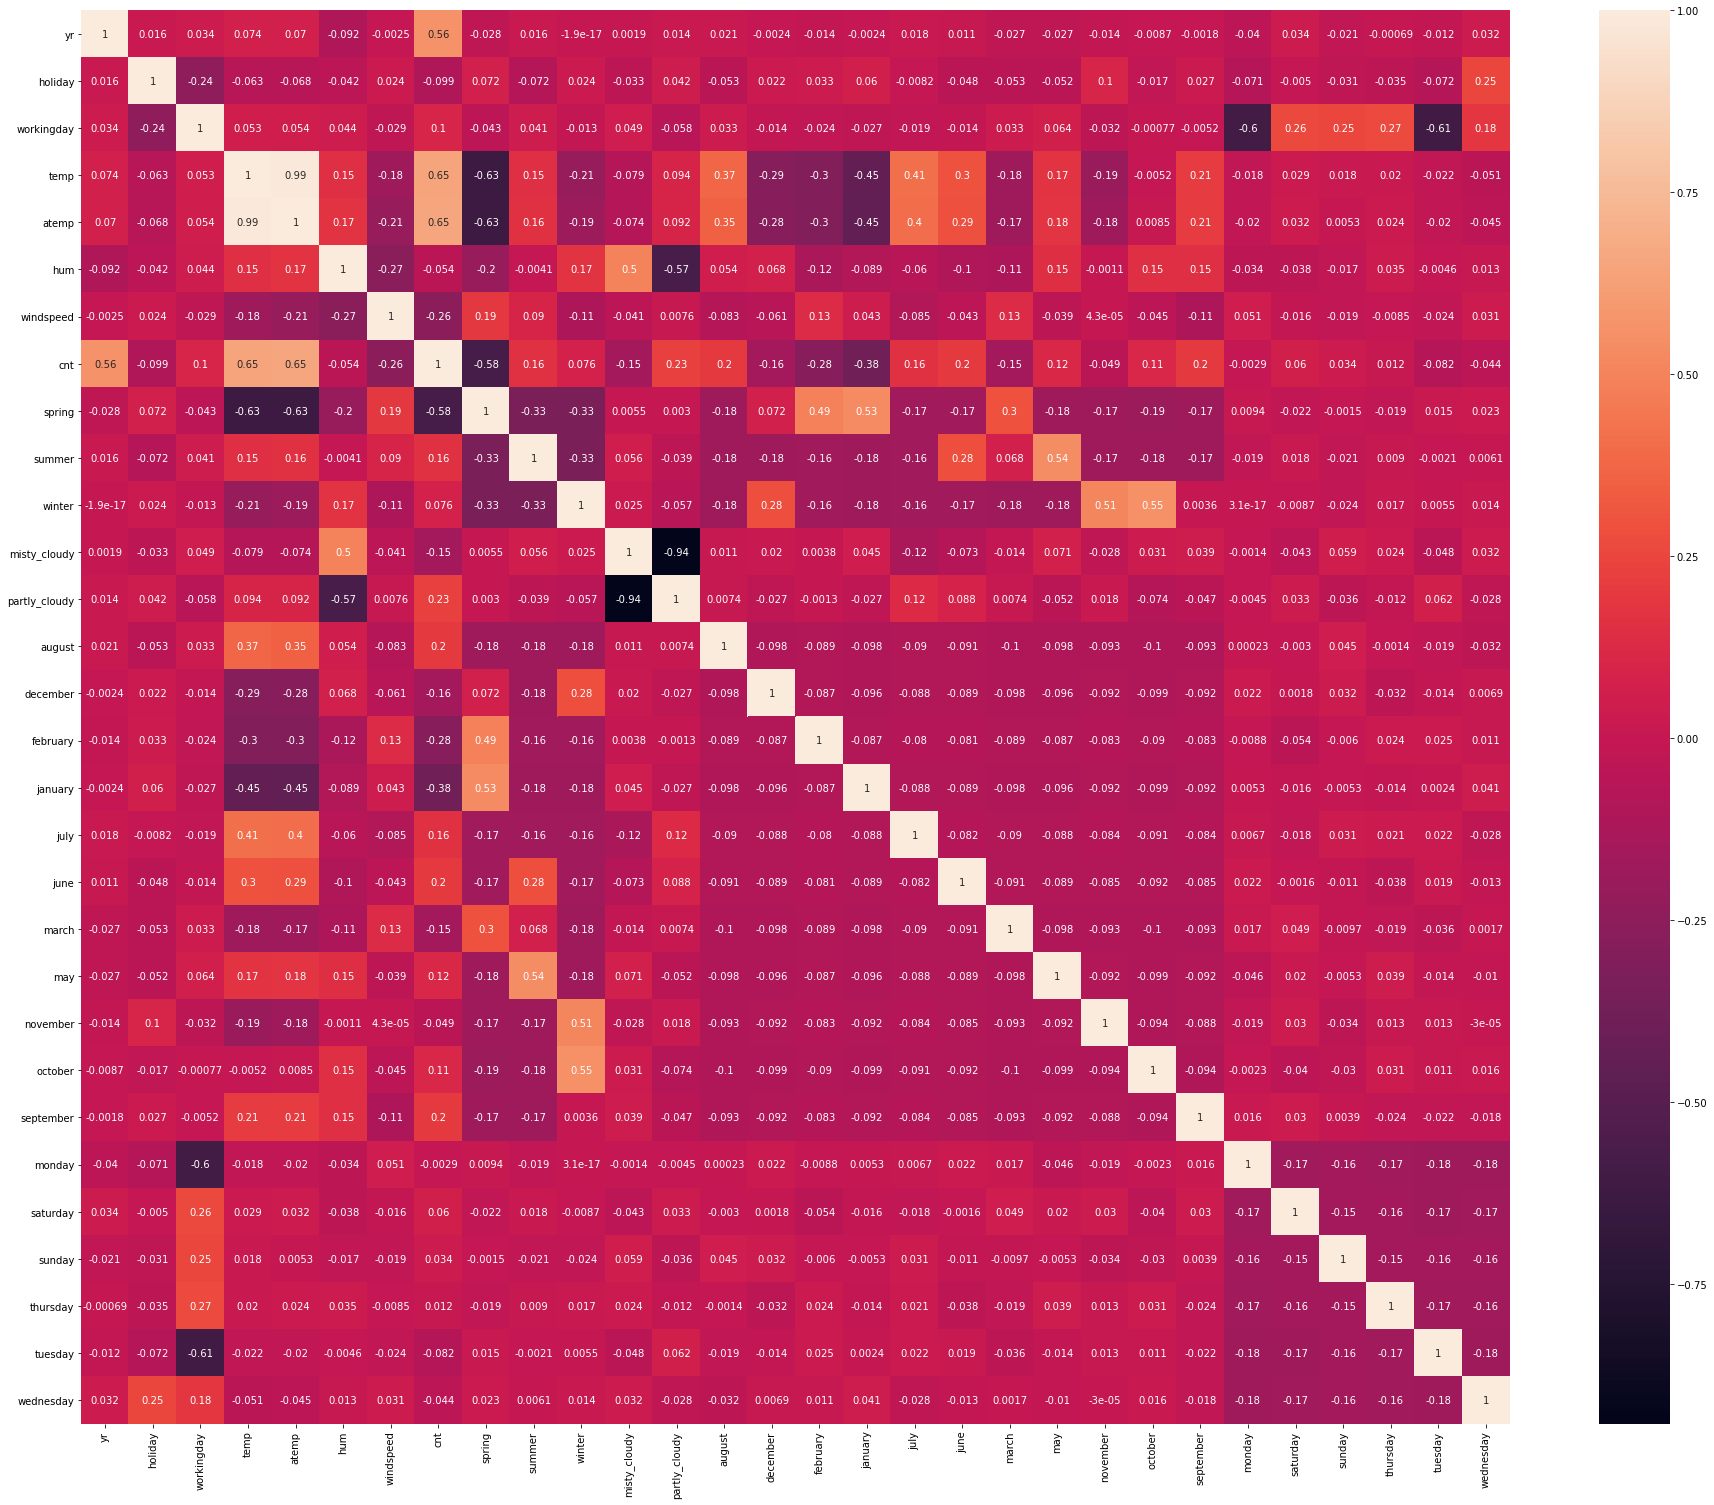

In [25]:
plt.figure(figsize=(32,26))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Split Train data in X - independant features and y - dependant features

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Feature Selection

In [27]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [28]:
rfe = RFE(lrm,15)
rfe = rfe.fit(X_train,y_train)
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns, rfe.support_))

[(1, 'december', True),
 (1, 'holiday', True),
 (1, 'hum', True),
 (1, 'january', True),
 (1, 'july', True),
 (1, 'misty_cloudy', True),
 (1, 'monday', True),
 (1, 'november', True),
 (1, 'partly_cloudy', True),
 (1, 'spring', True),
 (1, 'temp', True),
 (1, 'windspeed', True),
 (1, 'winter', True),
 (1, 'workingday', True),
 (1, 'yr', True),
 (2, 'september', False),
 (3, 'summer', False),
 (4, 'february', False),
 (5, 'atemp', False),
 (6, 'tuesday', False),
 (7, 'wednesday', False),
 (8, 'thursday', False),
 (9, 'may', False),
 (10, 'august', False),
 (11, 'october', False),
 (12, 'june', False),
 (13, 'sunday', False),
 (14, 'march', False),
 (15, 'saturday', False)]

In [29]:
auto_cols = X_train.columns[rfe.support_]

#### Automated feature selected using RFE

In [30]:
X_train_rfe = X_train[auto_cols]

### Build MLR Model

#### First MLR Model

In [31]:
## First model
X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.02e-223
Time:                        12:19:30   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0521      0.044      1.187      0.236      -0.034       0.138
yr                0.2289      0.007     30.876      0.000       0.214       0.243
holiday          -0.0436      0.024     -1.806      0.071      -0.091       0.004
workingday        0.0510      0.010      4.920      0.000       0.031       0.071
temp              0.4458      0.031     14.594      0.000       0.386       0.506
hum              -0.1295      0.035     -3.671      0.000      -0.199      -0.060
windspeed        -0.1838      0.024     -7.763      0.000      -0.230      -0.137
spring           -0.1105      0.014     -7.800      0.000      -0.138      -0.083
winter            0.0817      0.012      6.557      0.000       0.057       0.106
misty_cloudy      0.2037      0.024      8.621      0.000       0.157       0.250
partly_cloudy     0.2634      0.025     10.534      0.000       0.214       0.313
december         -0.0604      0.015     -3.937      0.000      -0.091      -0.030
january          -0.0500      0.016     -3.056      0.002      -0.082      -0.018
july             -0.0787      0.016     -5.030      0.000      -0.109      -0.048
november         -0.0688      0.017     -4.041      0.000      -0.102      -0.035
monday            0.0613      0.013      4.618      0.000       0.035       0.087
==============================================================================
Omnibus:                       96.561   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.184
Skew:                          -0.797   Prob(JB):                     3.22e-62
Kurtosis:                       6.017   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The first model indicates there is a `multicollinearity` problem in our model's features. Using `VIF` to identify multicollinearity

In [32]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,144.96
10,partly_cloudy,10.97
9,misty_cloudy,9.47
4,temp,3.56
7,spring,2.85
8,winter,2.19
5,hum,1.95
3,workingday,1.79
15,monday,1.70
14,november,1.62


#### Second MLR Model

Removing the feature <b>`holiday`</b> as it has a high <b>`p-Value of 0.071`</b> and a low multicollinearity value of <b>`VIF being 1.17`</b>.

In [33]:
## Second model
X_train_rfe.drop(['holiday'], axis=1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          6.59e-224
Time:                        12:19:30   Log-Likelihood:                 596.66
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     569   BIC:                            -1098.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0476      0.044      1.084      0.279      -0.039       0.134
yr                0.2287      0.007     30.792      0.000       0.214       0.243
workingday        0.0574      0.010      5.889      0.000       0.038       0.077
temp              0.4430      0.031     14.493      0.000       0.383       0.503
hum              -0.1283      0.035     -3.629      0.000      -0.198      -0.059
windspeed        -0.1847      0.024     -7.787      0.000      -0.231      -0.138
spring           -0.1120      0.014     -7.898      0.000      -0.140      -0.084
winter            0.0817      0.012      6.548      0.000       0.057       0.106
misty_cloudy      0.2036      0.024      8.599      0.000       0.157       0.250
partly_cloudy     0.2634      0.025     10.513      0.000       0.214       0.313
december         -0.0620      0.015     -4.037      0.000      -0.092      -0.032
january          -0.0513      0.016     -3.139      0.002      -0.083      -0.019
july             -0.0783      0.016     -4.996      0.000      -0.109      -0.048
november         -0.0722      0.017     -4.254      0.000      -0.106      -0.039
monday            0.0678      0.013      5.290      0.000       0.043       0.093
==============================================================================
Omnibus:                      100.725   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.825
Skew:                          -0.823   Prob(JB):                     2.88e-66
Kurtosis:                       6.113   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,144.49
9,partly_cloudy,10.97
8,misty_cloudy,9.47
3,temp,3.55
6,spring,2.84
7,winter,2.19
4,hum,1.94
11,january,1.60
13,november,1.60
2,workingday,1.58


#### Third MLR Model

Removing the feature <b>`misty_cloudy`</b> as it has a low <b>`p-Value of 0.000`</b> and a high multicollinearity value of <b>`VIF being 9.47`</b>.

In [35]:
## Third model
X_train_rfe.drop(['misty_cloudy'], axis=1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     215.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.78e-210
Time:                        12:19:30   Log-Likelihood:                 560.99
No. Observations:                 584   AIC:                            -1094.
Df Residuals:                     570   BIC:                            -1033.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2817      0.037      7.702      0.000       0.210       0.353
yr                0.2297      0.008     29.126      0.000       0.214       0.245
workingday        0.0538      0.010      5.199      0.000       0.033       0.074
temp              0.4621      0.032     14.270      0.000       0.398       0.526
hum              -0.1848      0.037     -5.009      0.000      -0.257      -0.112
windspeed        -0.2156      0.025     -8.663      0.000      -0.265      -0.167
spring           -0.1114      0.015     -7.400      0.000      -0.141      -0.082
winter            0.0762      0.013      5.756      0.000       0.050       0.102
partly_cloudy     0.0649      0.010      6.276      0.000       0.045       0.085
december         -0.0564      0.016     -3.461      0.001      -0.088      -0.024
january          -0.0420      0.017     -2.421      0.016      -0.076      -0.008
july             -0.0883      0.017     -5.321      0.000      -0.121      -0.056
november         -0.0677      0.018     -3.760      0.000      -0.103      -0.032
monday            0.0635      0.014      4.675      0.000       0.037       0.090
==============================================================================
Omnibus:                      123.153   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.835
Skew:                          -0.971   Prob(JB):                     2.75e-89
Kurtosis:                       6.604   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,88.91
3,temp,3.53
6,spring,2.84
7,winter,2.18
4,hum,1.88
8,partly_cloudy,1.66
12,november,1.60
10,january,1.59
2,workingday,1.58
13,monday,1.57


In [47]:
## Third model
# X_train_rfe.drop(['misty_cloudy'], axis=1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe[['const', 'yr', 'temp','spring','partly_cloudy','windspeed','january','july']])
lm = lr.fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     336.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          9.92e-199
Time:                        12:31:47   Log-Likelihood:                 516.95
No. Observations:                 584   AIC:                            -1018.
Df Residuals:                     576   BIC:                            -982.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2147      0.019     11.113      0.000       0.177       0.253
yr                0.2355      0.008     28.192      0.000       0.219       0.252
temp              0.4215      0.027     15.876      0.000       0.369       0.474
spring           -0.1394      0.013    -10.419      0.000      -0.166      -0.113
partly_cloudy     0.0912      0.009     10.460      0.000       0.074       0.108
windspeed        -0.1841      0.025     -7.246      0.000      -0.234      -0.134
january          -0.0363      0.018     -2.038      0.042      -0.071      -0.001
july             -0.0902      0.018     -5.134      0.000      -0.125      -0.056
==============================================================================
Omnibus:                       97.095   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.406
Skew:                          -0.828   Prob(JB):                     1.05e-57
Kurtosis:                       5.836   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[['const', 'yr', 'temp','spring','partly_cloudy','windspeed','january','july']].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[['const', 'yr', 'temp','spring','partly_cloudy','windspeed','january','july']].values, i) for i in range(X_train_rfe[['const', 'yr', 'temp','spring','partly_cloudy','windspeed','january','july']].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.57
2,temp,2.06
3,spring,1.95
6,january,1.46
7,july,1.24
5,windspeed,1.05
4,partly_cloudy,1.02
1,yr,1.01


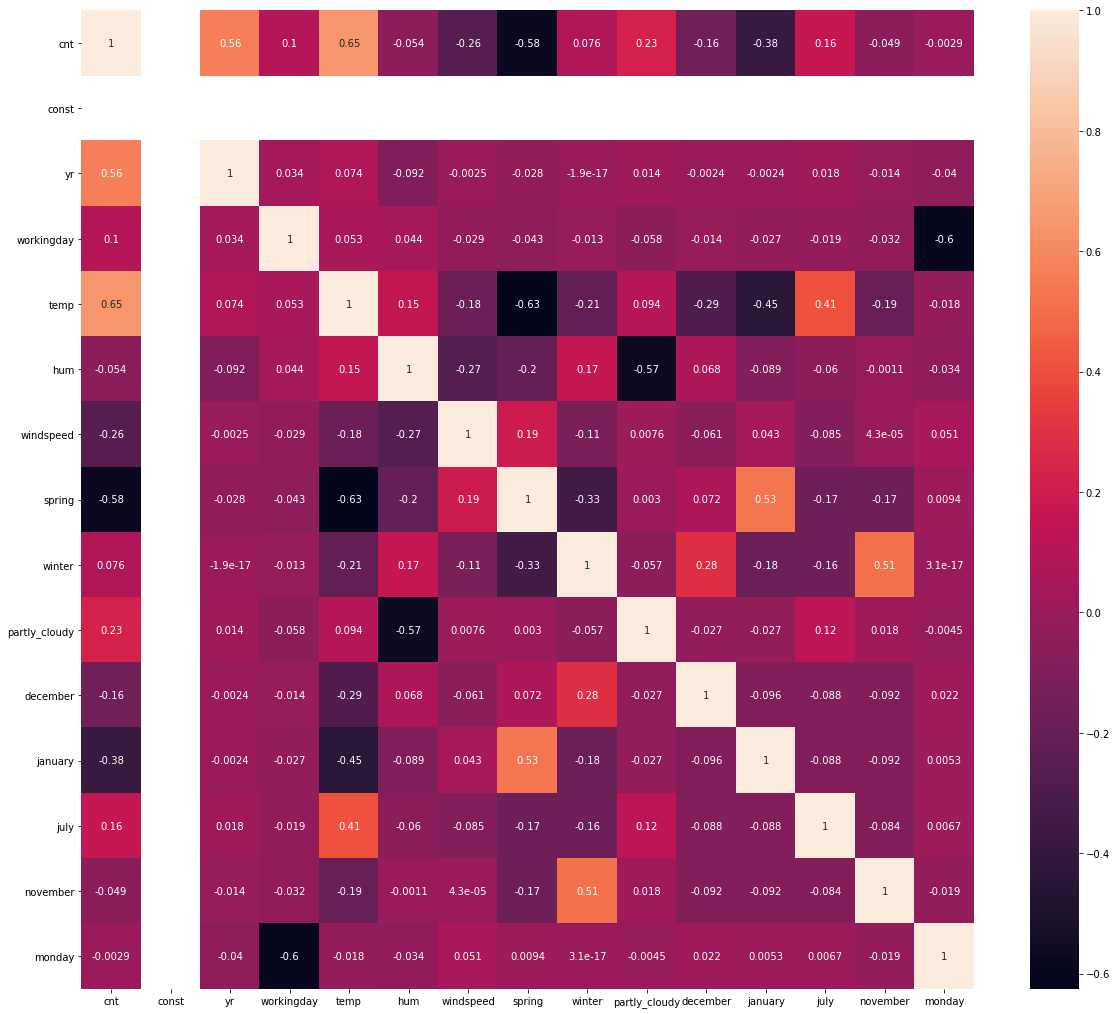

In [40]:
plt.figure(figsize=(20,18))
sns.heatmap(pd.concat([y_train, X_train_rfe], axis=1).corr(), annot=True)
plt.show()

#### The final model has a `R2` value of `0.831` where the model explains `83.6%` of the data set and an `Adjusted-R2` of `83.1%`.

### Residual Analysis

In [39]:
y_train_pred = lm.predict(X_train_rfe)

ValueError: shapes (584,14) and (4,) not aligned: 14 (dim 1) != 4 (dim 0)

In [ ]:
plt.figure(figsize=(32,26))
sns.heatmap(pd.concat([y_train_pred,X_train_rfe], axis=1).corr(), annot=True)
plt.show()

In [ ]:
error_terms = y_train - y_train_pred

In [ ]:
fig = plt.figure(figsize=(10,4))
sns.distplot(error_terms, bins=50)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

#### The error terms are centered around zero. Hence this assumption of Linear Regression holds true

In [ ]:
sns.scatterplot(x=y_train, y=y_train_pred)
plt.title("y_train vs y_train_pred")
plt.xlabel('Y_Train')
plt.ylabel('Y_Train_Pred')
plt.show()

In [ ]:
residual_sum_square = sum(error_terms.apply(lambda x: x**2))
round(residual_sum_square,2)

#### The RSS value is low at `4.86`

In [ ]:
residual_sum_error = np.sqrt(residual_sum_square/(error_terms.shape[0]-2))*100
round(residual_sum_error, 2)

#### The RSE value is low at `9.14%`

### Predict value of test data set

#### Rescaling test data set

In [ ]:
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])
df_test.head()

#### Splitting Data in X indepedent variables and Y dependent variable

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_sltFeat = X_test[X_train_rfe.columns]

#### Make prediction on the test data

In [ ]:
y_test_pred = lm.predict(X_test_sltFeat)

#### The `R2` score on the test data set is `0.780`. This means that the linear regression model explains `78%` of the test (unseen) data.

In [ ]:
r2_score(y_test, y_test_pred)

#### Calculate error terms on the test data set.

In [ ]:
test_error_terms = y_test - y_test_pred

In [ ]:
fig = plt.figure(figsize=(10,4))
sns.distplot(test_error_terms, bins=50)
fig.suptitle('Test Error Terms', fontsize = 20)
plt.xlabel('Test Errors', fontsize = 18) 
plt.show()

#### The error terms are centered around zero. Hence this assumption of Linear Regression on Test Data holds true

In [ ]:
residual_sum_square_test = sum(test_error_terms.apply(lambda x: x**2))
round(residual_sum_square_test,2)

#### The RSS value is low at `1.44`. This is lower than the training data, so the model is accurate.

In [ ]:
residual_sum_error_test = np.sqrt(residual_sum_square_test/(test_error_terms.shape[0]-2))*100
round(residual_sum_error_test, 2)

#### The RSE value is low at `10%` but marginally higher than the training data which can be considered negligible.

In [ ]:
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title("y_test vs y_test_pred")
plt.xlabel('Y_Test')
plt.ylabel('Y_Test_Pred')
plt.show()